<div style="text-align: right"><strong>Capstone #3:</strong> <span style="color:darkred">Supervised Learning</span> </div>

# <span style="color:red">BACKUP OF PERSONALIZED NLP DESIGN</span>

<a id="top"></a>

#### <span style="color:darkred">__Part 1: Data Exploration__ https://github.com/kimrharper/thinkful/blob/master/unit3/unit3-capstone-exploration.ipynb </span><br><br><span style="color:darkred">__Part 2: Models__ https://github.com/kimrharper/thinkful/blob/master/unit3/unit3-capstone-models.ipynb </span>

----

# <span style="color:darkred">Part 1: </span><span style="color:darkblue">L1 Prediction from ELL Writing Samples</span>

__Author:__ Ryan Harper 

----

<a href='#ov'>Overview</a><br>
<a href='#exp'>Experiment</a><br>
<a href='#sec1'>1. Cleaning Data</a><br>
<a href='#sec2'>2. Exploring the Data</a><br>

<a id="ov"></a>

# <span style="color:darkblue">Overview</span>  <a href='#top'>(top)</a>

__Data Source:__
> http://lang-8.com/ [scraped with Beautiful Soup]

![alt text](../data/language/lang8.png "Title")

__Summary:__
> In my previous profession, I have been teaching English to a diverse range of students of all ages, language background, and country origin. During my professional development, I started to observe that different students with different L1s (1st Language) tended to display different patterns of communication that appeared to have some connection to either education in their country of origin or a connection to the linguistic structure of their first language. Different ELL (English Language Learners) needed to focus on different aspects of the English language depending on their background. The purpose of this project is to use a large number of blog posts from a language practicing website and explore whether or not the L1 has any significant impact on the blog writing style of the English learner.<br><br>Part 1: Explore the data to find any noteworthy trends in linguistic structure: <ol><li> vocabulary (word freq, collocations, and cognates) <li>syntax (sentence structure)<li>grammar (i.e. grammar complexity of sentences) <li>errors (types of errors) <li> parts of speech (NLTK Abbreviations: https://pythonprogramming.net/natural-language-toolkit-nltk-part-speech-tagging/)</ol><br>Part 2: Use linguistic trends to determine whether or not a learner's first language can be predicted.

__Variables:__
>__id:__ _User ID_<br>
__time:__ _Time the blog post was scraped (in order of user posted time)_ <br>
__title:__ _Title of the blog post_<br>
__content:__ _The blog post_<br>
__language:__ _User's self-reported first language_

<a id="exp"></a>

# <span style="color:darkblue">Experiment</span> <a href='#top'>(top)</a>

__Hypothesis:__ 
> L1 (first language) experience and academic environment influences ELLs' (English Language Learners') writing style. The L1 of ELLs can be predicted by looking at English blog posts and identifying patterns unique to their L1.

__Observations:__
><li> --<li>--<li>--

__Method:__
> Using multiple different models. The aim of this project is to explore how different models can handle the data (target and features) and to see what information can be gained from using multiple different models. Ultimately, the goal is to determine which models are appropriate for a binary (discrete) target with features that are both qualitative (discrete) and quantitative (ranked/continuous).

<a id="sec1"></a>

# <span style="color:darkblue">1. Cleaning the Data</span>  <a href='#top'>(top)</a>

In [1]:
# from nltk.corpus import brown
# nltk.download('brown')

In [2]:
# iPython/Jupyter Notebook
import time
from pprint import pprint
import warnings
from IPython.display import Image

# Data processing
import pandas as pd
import plotly as plo
import seaborn as sns
from collections import Counter

# Statistics
from scipy import stats
from scipy.stats import ttest_ind, mannwhitneyu, median_test, f_oneway

# NLP
from nltk.corpus import stopwords as sw
from nltk.util import ngrams
from nltk.corpus import brown
import nltk
import re
from nltk.tokenize import RegexpTokenizer
import difflib

# import altair as alt

In [3]:
# load and close files
def get_text(link):
    with open(link) as f:
        output = f.read()
    return output

In [4]:
# Jupyter Settings and Imports
%pylab
%matplotlib inline 
warnings.filterwarnings(action='once')

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [5]:
# Import data
blog = pd.read_csv('../data/language/blogdata-reduced.csv')
blog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15709 entries, 0 to 15708
Data columns (total 6 columns):
Unnamed: 0    15709 non-null int64
id            15709 non-null int64
time          15709 non-null object
title         15709 non-null object
content       15709 non-null object
language      15709 non-null object
dtypes: int64(2), object(4)
memory usage: 736.4+ KB


In [6]:
# Import data
blog = pd.read_csv('../data/language/blogdata-reduced.csv')

# Clean Data
del blog['Unnamed: 0']
blog.language = blog.language.mask(blog.language == 'Mandarin', 'Traditional Chinese').replace(['Persian', 'Arabic',
        'Bulgarian', 'Swedish', 'Slovenian', 'Slovak', 'Malay', 'Turkish','Romanian', 'Czech', 'Danish', 'Vietnamese',
        'Norwegian','Serbian','Other language','Lithuanian', 'Ukrainian', 'Finnish','Estonian','Bengali','Russian', 
        'Spanish','French', 'German', 'Cantonese','Mongolian', 'Tagalog', 'Polish', 'Dutch','Italian', 'Portuguese(Brazil)', 
        'Thai', 'Indonesian', 'Cantonese','Urdu', 'Hungarian'], np.nan)
blog = blog.dropna()

In [7]:
blog.info(verbose=False, memory_usage=False,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14473 entries, 0 to 15689
Columns: 5 entries, id to language
dtypes: int64(1), object(4)

In [8]:
blog.head()

,id,time,title,content,language
0,1,2018-03-15 23:52:01.424272+00:00,I'm going to Silicon Valley!,I will visit Silicon Valley in California bet...,Japanese
1,1,2018-03-15 23:52:06.279421+00:00,Sightseeing in Kyoto,My parents want to take their Chinese guests ...,Japanese
2,1,2018-03-15 23:52:09.582504+00:00,Shaku-gan no SHANA,Do you know a Japanese animation (and novel) ...,Japanese
3,2,2018-03-16 00:00:59.456895+00:00,Unlucky,I went to watch a featherweight throne jump-o...,Japanese
4,2,2018-03-16 00:01:03.120751+00:00,Stone Art???,There is a traditional custum that a blood re...,Japanese


In [9]:
# Confirmation that there are no more null values
blog.isnull().values.any()

False

In [10]:
def lettercheck(val):
    reLetters = re.compile('[^a-zA-Z]')
    onlyletters = reLetters.sub('', val)
    return len(onlyletters)/len(val)

In [11]:
blog['letters_per'] = blog.content.apply(lettercheck)
print('Blogs with less than 50% letter percentage: {}'.format(blog.loc[blog['letters_per'] <= .5].content.count()))
blog = blog.loc[blog['letters_per'] > .5]

Blogs with less than 50% letter percentage: 418


<a id="sec2"></a>

# <span style="color:darkblue">2. Exploring the Data</span>  <a href='#top'>(top)</a>

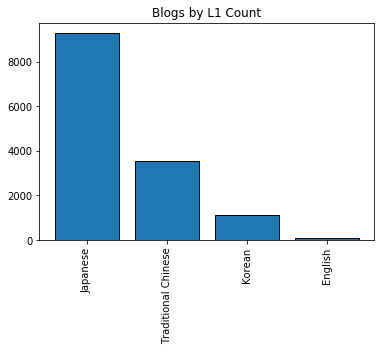

In [12]:
vals = list(blog.language.value_counts().values)
languages = list(blog.language.value_counts().index)
plt.figure(figsize(6,4))
plt.bar(languages,vals,edgecolor='black')
plt.title('Blogs by L1 Count')
plt.xticks(rotation='vertical')
plt.show()

In [13]:
blog.loc[blog.language == 'English'].count()

id             73
time           73
title          73
content        73
language       73
letters_per    73
dtype: int64

In [14]:
blog['char_count'] = blog.content.apply(len)

In [15]:
def reject_outliers(data, m=3):
    data = data[abs(data - np.mean(data)) < m*np.std(data)]
    return data[~numpy.isnan(data)]

lanlenseries = [reject_outliers(blog.char_count[blog.language == l]) for l in list(blog.language.unique())]

In [16]:
list(blog.language.unique())

['Japanese', 'Korean', 'Traditional Chinese', 'English']

/Users/ryan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



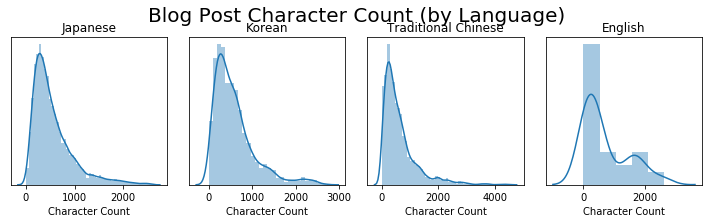

In [17]:
i = 1
plt.figure(figsize=(10,3))

languages = [l for l in list(blog.language.unique())]

for n, column in enumerate(lanlenseries):
    plt.subplot(1, 4, i)
    i = i + 1
    sns.distplot(column)
    plt.title(languages[n])
    plt.yticks([])
    plt.xlabel('Character Count')

plt.tight_layout()
plt.suptitle('Blog Post Character Count (by Language)',fontsize=20,y=1.02)
plt.show()

<a id="nlp"></a>

### <span style="color:darkred">NLP: Spell Check, Tokenization, Collocations, Parts of Speech, and Syntax</span>  <a href='#top'>(top)</a>

__Analyze Characters__

In [18]:
from string import punctuation
from collections import Counter

def per_check(string_value, total):
    percentage = len(string_value)
    if percentage != 0:
        percentage = float(total / percentage)
    else:
        percentage = 0
        
    return percentage

def punc_count(string_value):
    count = 0
    for c in string_value:
        if c in punctuation:
            count+= 1
    return per_check(string_value, count)

def caplet_count(string_value):
    count = 0
    for c in string_value:
        if c.isupper():
            count+= 1
    
    return per_check(string_value, count)

__Initialize Dictionary__

In [19]:
import re
from collections import Counter

# collects all the words loaded in a text object and breaks them into words using Regex
def words(text): return re.findall(r'\w+', text.lower())

# 1. populates the data set with real corpora...could be expanded to include user's personal content
# 2. counts the number of times a word occurs in the corpora
# WORDS = Counter(words(get_text('../data/dic/big.txt')))
WORDS = Counter(map(str.lower, brown.words()))

In [20]:
def P(word, N=sum(list(WORDS.values()))): 
    # Calculates the frequency count a word occurs in the overall WORDS list (i.e. 'the' has a high percentage)
    return WORDS[word] / N

def correction(word): 
    # Collects list of possible words only exist in WORDS and checks probability
    wordlist = candidates(word)
    finalcorrection = max(wordlist, key=P)
    
    possiblechoices = {}
    
    for w in wordlist:
        possiblechoices[w] = P(w)
        
    return finalcorrection

def blog_corrections(l):
    corrected = []
    for w in l:
        c = correction(w)
        if c != w:
            corrected.append([c,w])
#     print('|',end='')
    return corrected

def candidates(word): 
    # (1) return word if in WORDS (i.e. correct), 
    # (2) return word if edits1 of word results in word in WORDS (i.e. typo)
    # (3) return word if edits2 on each word in edits1 results in a word in WORDS (i.e. 2 typos)
    answer = (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])
    return answer

def known(words): 
    # checks list of words to see if they exists in the WORDS database
    return set(w for w in words if w in WORDS)

def edits1(word):
    # initialize the letters
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    
    # Create a list of splits for the word so that four processes can be run at each split: (# of splits = length of word)
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    
    # 1. Create a list of one letter deletes from R side of split
    deletes    = [L + R[1:]               for L, R in splits if R]
    
    # 2. Create a list of words with switched letters using L,R from split for position
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    
    # 3. Create a list of words with replaced letters from R side of split using 26 letters * number splits
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    
    # 4. Create a list of words with letter inserts between L and R of split using 26 letters * number splits
    inserts    = [L + c + R               for L, R in splits for c in letters]
    
    # Returns the unique set of all real and unreal words created from each of the four processes
    return set(deletes + transposes + replaces + inserts)

def edits2(word):
    # If edits1 does not return a known word, edits2 check runs a process on each uknown word made in edits1
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [21]:
def changes_list(l):
    cha = []
    for c,w in l:
        cha.append(changes(c,w))
    
    if len(cha) > 0:
        return list(np.concatenate(np.array(cha)))
    else:
        return []

def changes(check,word):
    changes = []
    for i,s in enumerate(difflib.ndiff(word, check)):
        if s[0]==' ': continue
        elif s[0]=='-':
            changes.append('-'+s[-1])
        elif s[0]=='+':
            changes.append('+'+s[-1])  
    return changes

def check_list(l):
    checks = []
    for c,w in l:
        checks.append(check(c,w))
        
    return checks
        

def check(check,word):
    c = True
    letters = 'abcdefghijklmnopqrstuvwxyz'
    l = []
    
    while c:
        if len(l) == 0:
            splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
            deletes    = [L + R[1:]               for L, R in splits if R]
            if check in deletes:
                return 'del'
            transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
            if check in transposes:
                return 'tra'
            replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
            if check in replaces:
                return 'rep'
            inserts    = [L + c + R               for L, R in splits for c in letters]
            if check in inserts:
                return 'ins' 
            l = list(set(deletes + transposes + replaces + inserts))
            
        else:
            for word in l:
                splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]

                deletes    = [L + R[1:]               for L, R in splits if R]
                if check in deletes:
                    return 'del'

                transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
                if check in transposes:
                    return 'tra'

                replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
                if check in replaces:
                    return 'rep'

                inserts    = [L + c + R               for L, R in splits for c in letters]
                if check in inserts:
                    return 'ins'
                
            c == False

__Initialize NLTK variables__

In [22]:
# Set NLP Variables
stop_words = set(sw.words('english'))
tokenizer = RegexpTokenizer(r'\w+')
punct = re.compile(r'\w')
nountype = re.compile(r'N')
preplist = [i[0] for i in [('of', 268),('in', 209),('for', 123),('that', 81),('on', 70),('with', 70),('from', 51),
                           ('at', 45),('as', 44),('about', 42),('if', 39),('by', 36),('like', 31),('because', 19),
                           ('than', 17),('after', 17),('over', 15), ('without', 15),('before', 14),('so', 12),
                           ('though', 12),('since', 11),('into', 10), ('whether', 9),('while', 9),('during', 7),
                           ('under', 7), ('through', 6),('out', 6),('above', 6)]]

detlist = [i[0] for i in [('the', 25028), ('a', 16990), ('this', 5456), ('some', 2027), ('that', 1703), ('an', 1657), 
                          ('all', 1390), ('no', 946), ('these', 880), ('every', 664), ('any', 605), ('each', 449), 
                          ('another', 386),('those', 375),('both', 218),('either', 24),('neither', 10)]]

cclist = [i[0] for i in [('and', 15733),('but', 5601), ('or', 2314), ('nor', 33),('either', 20),
                         ('plus', 16), ('neither', 12)]]

# My personal syntax tree (needs improvement)
chunkGram = r"""
Question: {^<WP|WRB>|^<MD>}
Passive: {<RB>?<MD>?<RB>?<VBD|VB|VBP><RB>?<VBN><RB>?<VBN>?}
Active: {<RB>?<MD>?<RB>?<VB\w?>+<RB>?}
CP: {<JJ\w?>+}
NP:{(<DT|PRP.>|<CP>)<N\w+|PRP>}
NPC: {<NP><CC><NP>}
PP:{<IN><NP>}
INF:{<TO><VB><PP>?}
PRT: {<VBG>}
NPP: {<NP|PP|INF|PRT><NP|PP|INF|PRT>}
Subject: {<NP|NPP|NPC|N\w+|PRP>}<Active|Passive>
Object: <Active|Passive|Imperative>{<NP|NPP|NPC|N\w+|PRP>|(<IN><NPP|NP|N\w+|PRP>)}
Imperative: {^<Active>}
Adverbial: {<RB>}
"""

/Users/ryan/anaconda3/lib/python3.6/site-packages/nltk/corpus/reader/wordlist.py:28: ResourceWarning:

unclosed file <_io.BufferedReader name='/Users/ryan/nltk_data/corpora/stopwords/english'>



In [72]:
def tokendict(d):
    for sw in stop_words:
        if sw in d:
            del d[sw]
    return d


# nltk.brill_tagger
# text_blob
# nlkt.pos_tag

def onlygetPOS(val):
#     tagged = nltk.pos_tag(nltk.word_tokenize(val)) 
    
    tagged = nltk.tag.brill.BrillTagger(nltk.word_tokenize(val))
    return [v if punct.search(v) else 'PUNCT' for i,v in tagged ]

def onlygetCC(val):
    tagged = nltk.pos_tag(nltk.word_tokenize(val))   
    return [i for i,v in tagged if i in cclist]

def onlygetDET(val):
    tagged = nltk.pos_tag(nltk.word_tokenize(val))   
    return [i for i,v in tagged if i in detlist]

def onlygetPREP(val):
    tagged = nltk.pos_tag(nltk.word_tokenize(val))
    return [i for i,v in tagged if i in preplist]

def getPOS(val):
    words = nltk.word_tokenize(val)
    return nltk.pos_tag(words)

def getSYNTAX(val):
    chunkParser = nltk.RegexpParser(chunkGram)
    chunked = chunkParser.parse(getPOS(val))
    return chunked

def getNOUNTYPE(val):
    tagged = nltk.pos_tag(nltk.word_tokenize(val))
    return [v for i,v in tagged if nountype.search(v)]

# create set of stop words from nltk corpus
def posbigram(value):
    bigrm = list(nltk.bigrams(value))
    bigramlist = []
    
    for bigram in bigrm:
        bigramlist.append('-'.join(bigram))
        
    return bigramlist

In [24]:
%%time
blog['tokens'] = blog.content.str.lower().apply(tokenizer.tokenize)
blog['word_count'] = blog.tokens.apply(len)
blog['punc_per'] = blog.content.apply(punc_count)
blog['caplet_per'] = blog.content.apply(caplet_count)

CPU times: user 1.5 s, sys: 55.5 ms, total: 1.56 s
Wall time: 1.62 s


In [73]:
%%time
blog['pos'] = blog.content.str.lower().apply(onlygetPOS)
blog['determiners'] = blog.content.str.lower().apply(onlygetDET)
blog['prepositions'] = blog.content.str.lower().apply(onlygetPREP)
blog['complementizer'] = blog.content.str.lower().apply(onlygetCC)
blog['ntype'] = blog.content.str.lower().apply(getNOUNTYPE)

TypeError: __init__() missing 1 required positional argument: 'rules'

In [26]:
%%time
blog['corrections'] = blog.tokens.apply(blog_corrections)

CPU times: user 46min 33s, sys: 12.5 s, total: 46min 46s
Wall time: 1h 14min 40s


In [27]:
%%time
blog['checks'] = blog.corrections.apply(check_list)
blog['changes'] = blog.corrections.apply(changes_list)
blog['error_per'] = blog.corrections.apply(len) / blog.word_count

CPU times: user 3min 7s, sys: 1.95 s, total: 3min 9s
Wall time: 3min 17s


In [28]:
blog['pos_bigram'] = blog.pos.apply(posbigram)

__Backup File__

In [29]:
blog.to_csv('processed_blog_data.csv')

__Bar Plots__

In [30]:
lang = list(blog.language.unique())

def count_vals_df(df,col):
    return pd.DataFrame(data = [Counter(np.concatenate(np.array(df[col][blog.language == l]))) for l in lang], 
                        index = [l for l in lang]).T.fillna(0).sort_values(by='Japanese',ascending=False)

def graphsum(df):
    for l in df:
        df[l] = df[l]/df[l].sum()
    return df

def graph_bar(df,name,dim):
    graphsum(df).plot.bar(rot=0,figsize=dim)
    plt.title(name)
    plt.show()
    
def graph_hbar(df,name,dim):
    graphsum(df).plot.barh(rot=0,figsize=dim)
    plt.title(name)
    plt.show()

In [ ]:
fig= planguage.iloc[900:-1].plot.barh(rot=0,figsize=(50,50))
plt.savefig('partsofspeech.png')
plt.close()

In [46]:
blog.head()

,id,time,title,content,language,letters_per,char_count,tokens,word_count,punc_per,...,pos,determiners,prepositions,complementizer,ntype,corrections,checks,changes,error_per,pos_bigram
0,1,2018-03-15 23:52:01.424272+00:00,I'm going to Silicon Valley!,I will visit Silicon Valley in California bet...,Japanese,0.760383,313,"[i, will, visit, silicon, valley, in, californ...",60,0.035144,...,"[NN, MD, VB, JJ, NN, IN, NN, IN, JJ, NN, PRP$,...","[that, that]","[in, that, that, with, if, in]","[and, and, and, and, or]","[NN, NN, IN, NN, IN, NN, NNS, IN, NN, IN, NNS,...","[[with, wth]]",[ins],[+i],0.016667,"[NN-MD, MD-VB, VB-JJ, JJ-NN, NN-IN, IN-NN, NN-..."
1,1,2018-03-15 23:52:06.279421+00:00,Sightseeing in Kyoto,My parents want to take their Chinese guests ...,Japanese,0.785714,168,"[my, parents, want, to, take, their, chinese, ...",31,0.023810,...,"[PRP$, NNS, VBP, TO, VB, PRP$, JJ, NNS, TO, VB...","[the, any]","[in, if]",[],"[NNS, NNS, IN, NN, NN, IN, NNS, NN]",[],[],[],0.000000,"[PRP$-NNS, NNS-VBP, VBP-TO, TO-VB, VB-PRP$, PR..."
2,1,2018-03-15 23:52:09.582504+00:00,Shaku-gan no SHANA,Do you know a Japanese animation (and novel) ...,Japanese,0.772464,690,"[do, you, know, a, japanese, animation, and, n...",127,0.036232,...,"[VB, PRP, VB, DT, JJ, NN, PUNCT, CC, RB, PUNCT...","[a, no, a, the, the, some, no, no, the, the, t...","[of, of, into, if, from, on, in, with, of, bef...","[and, but, and]","[NN, NN, IN, NN, NN, IN, NN, IN, IN, NN, IN, I...","[[shake, shaku], [an, gan], [shann, shana], [a...","[rep, del, rep, rep, rep, rep, rep, rep, del, ...","[-u, +e, -g, -a, +n, -m, +a, -k, +n, -k, -u, +...",0.220472,"[VB-PRP, PRP-VB, VB-DT, DT-JJ, JJ-NN, NN-PUNCT..."
3,2,2018-03-16 00:00:59.456895+00:00,Unlucky,I went to watch a featherweight throne jump-o...,Japanese,0.800000,325,"[i, went, to, watch, a, featherweight, throne,...",57,0.024615,...,"[JJ, VBD, TO, VB, DT, JJ, NN, NN, IN, DT, JJ, ...","[a, the, the, the, the, the, the, a]","[of, on, as, of, for, with, of, for, with]","[and, but]","[NN, NN, IN, NN, NN, IN, NN, NN, NN, IN, NN, I...","[[nehf, njkf], [canada, hanawa], [blizzard, bl...","[rep, rep, ins]","[-j, -k, +e, +h, -h, +c, -w, +d, +z]",0.052632,"[JJ-VBD, VBD-TO, TO-VB, VB-DT, DT-JJ, JJ-NN, N..."
4,2,2018-03-16 00:01:03.120751+00:00,Stone Art???,There is a traditional custum that a blood re...,Japanese,0.791176,340,"[there, is, a, traditional, custum, that, a, b...",59,0.038235,...,"[EX, VBZ, DT, JJ, NN, IN, DT, NN, NN, VBD, JJ,...","[a, that, a, some, an, the, the]","[that, in, from, in]","[and, or]","[NN, IN, NN, NN, NNS, NN, NN, IN, NN, NNS, IN,...","[[custom, custum], [canadian, canadaian]]","[rep, del]","[-u, +o, -a]",0.033898,"[EX-VBZ, VBZ-DT, DT-JJ, JJ-NN, NN-IN, IN-DT, D..."


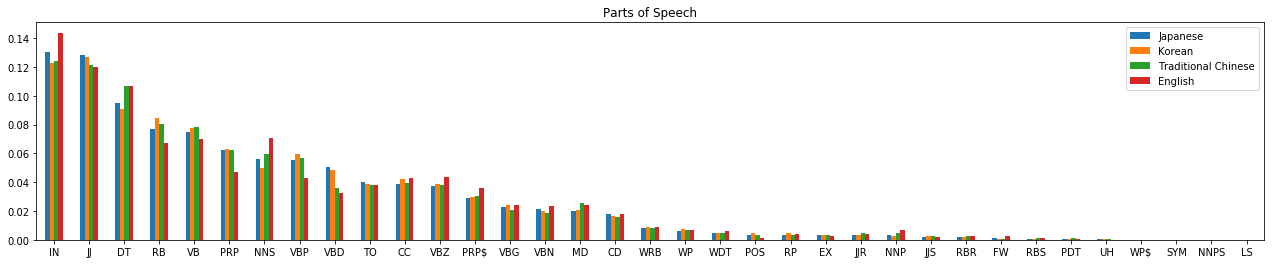

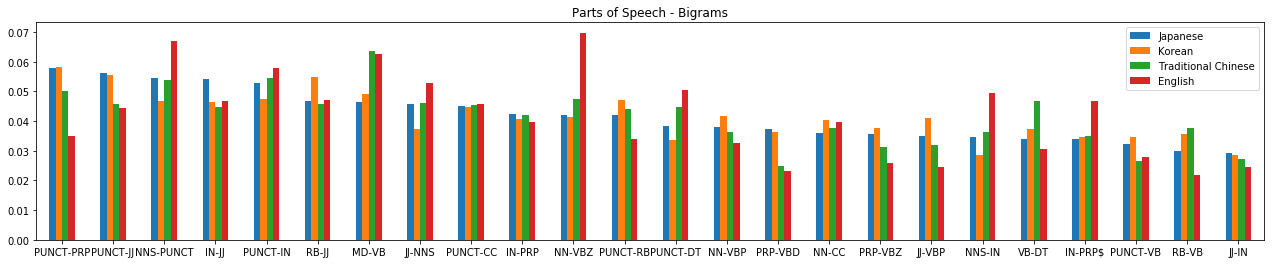

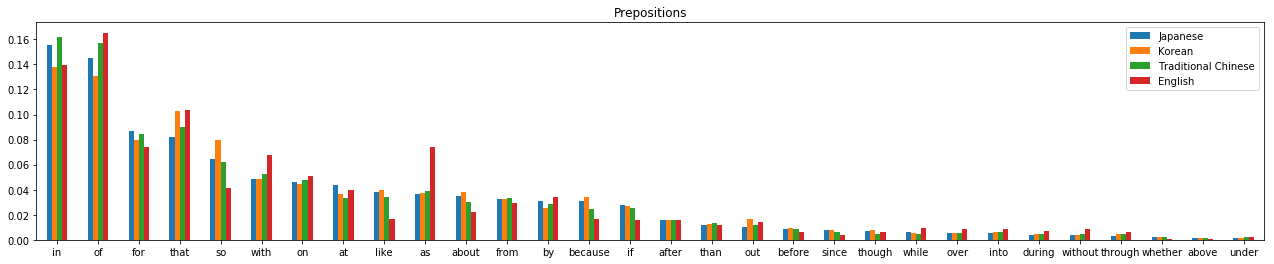

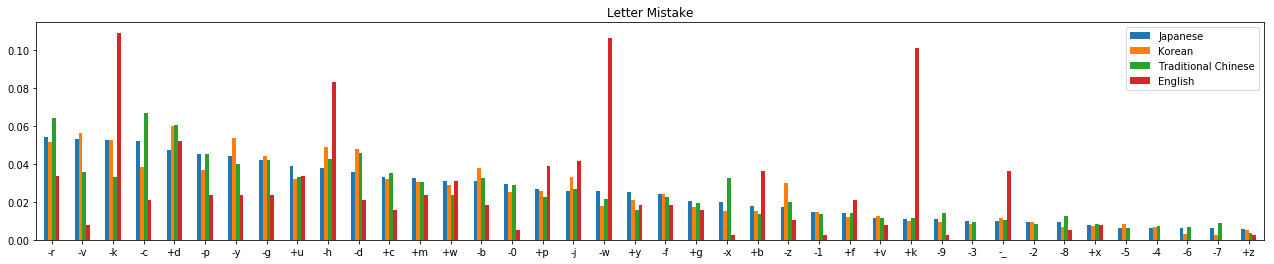

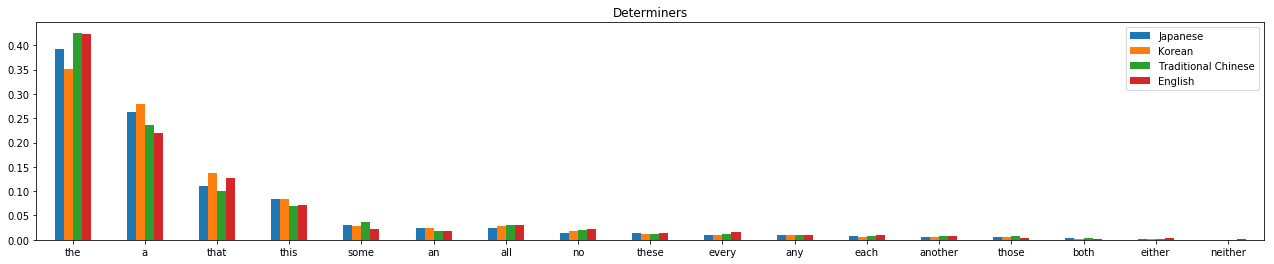

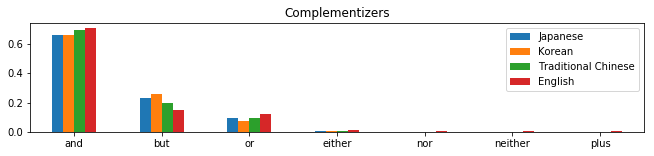

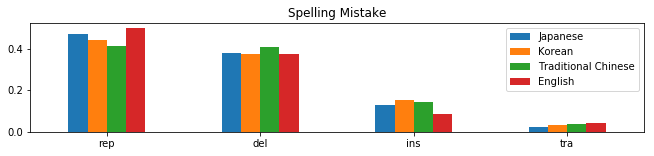

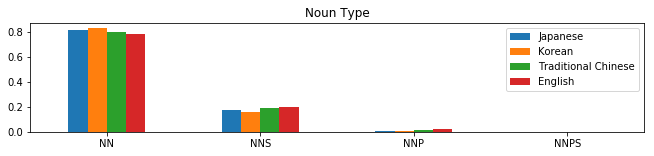

In [45]:
posDF = count_vals_df(blog,'pos').drop(['NN','PUNCT'])
graph_bar(posDF,'Parts of Speech',(22, 4))

posbigDF = count_vals_df(blog,'pos_bigram').iloc[15:39]
graph_bar(posbigDF,'Parts of Speech - Bigrams',(22, 4))

prepDF = count_vals_df(blog,'prepositions')
graph_bar(prepDF,'Prepositions',(22, 4))

lettersDF = count_vals_df(blog,'changes').iloc[20:60]
graph_bar(lettersDF.iloc[0:40,0:4],'Letter Mistake',(22, 4))

detDF = count_vals_df(blog,'determiners')
graph_bar(detDF,'Determiners',(22, 4))
    
ccDF = count_vals_df(blog,'complementizer')
graph_bar(ccDF,'Complementizers',(11, 2))

checksDF = count_vals_df(blog,'checks')
graph_bar(checksDF,'Spelling Mistake',(11, 2))

ntypeDF = count_vals_df(blog,'ntype').drop(['IN','VBN'])
graph_bar(ntypeDF,'Noun Type',(11, 2))

__Correlations__

In [47]:
blog.head(10)

,id,time,title,content,language,letters_per,char_count,tokens,word_count,punc_per,...,pos,determiners,prepositions,complementizer,ntype,corrections,checks,changes,error_per,pos_bigram
0,1,2018-03-15 23:52:01.424272+00:00,I'm going to Silicon Valley!,I will visit Silicon Valley in California bet...,Japanese,0.760383,313,"[i, will, visit, silicon, valley, in, californ...",60,0.035144,...,"[NN, MD, VB, JJ, NN, IN, NN, IN, JJ, NN, PRP$,...","[that, that]","[in, that, that, with, if, in]","[and, and, and, and, or]","[NN, NN, IN, NN, IN, NN, NNS, IN, NN, IN, NNS,...","[[with, wth]]",[ins],[+i],0.016667,"[NN-MD, MD-VB, VB-JJ, JJ-NN, NN-IN, IN-NN, NN-..."
1,1,2018-03-15 23:52:06.279421+00:00,Sightseeing in Kyoto,My parents want to take their Chinese guests ...,Japanese,0.785714,168,"[my, parents, want, to, take, their, chinese, ...",31,0.023810,...,"[PRP$, NNS, VBP, TO, VB, PRP$, JJ, NNS, TO, VB...","[the, any]","[in, if]",[],"[NNS, NNS, IN, NN, NN, IN, NNS, NN]",[],[],[],0.000000,"[PRP$-NNS, NNS-VBP, VBP-TO, TO-VB, VB-PRP$, PR..."
2,1,2018-03-15 23:52:09.582504+00:00,Shaku-gan no SHANA,Do you know a Japanese animation (and novel) ...,Japanese,0.772464,690,"[do, you, know, a, japanese, animation, and, n...",127,0.036232,...,"[VB, PRP, VB, DT, JJ, NN, PUNCT, CC, RB, PUNCT...","[a, no, a, the, the, some, no, no, the, the, t...","[of, of, into, if, from, on, in, with, of, bef...","[and, but, and]","[NN, NN, IN, NN, NN, IN, NN, IN, IN, NN, IN, I...","[[shake, shaku], [an, gan], [shann, shana], [a...","[rep, del, rep, rep, rep, rep, rep, rep, del, ...","[-u, +e, -g, -a, +n, -m, +a, -k, +n, -k, -u, +...",0.220472,"[VB-PRP, PRP-VB, VB-DT, DT-JJ, JJ-NN, NN-PUNCT..."
3,2,2018-03-16 00:00:59.456895+00:00,Unlucky,I went to watch a featherweight throne jump-o...,Japanese,0.800000,325,"[i, went, to, watch, a, featherweight, throne,...",57,0.024615,...,"[JJ, VBD, TO, VB, DT, JJ, NN, NN, IN, DT, JJ, ...","[a, the, the, the, the, the, the, a]","[of, on, as, of, for, with, of, for, with]","[and, but]","[NN, NN, IN, NN, NN, IN, NN, NN, NN, IN, NN, I...","[[nehf, njkf], [canada, hanawa], [blizzard, bl...","[rep, rep, ins]","[-j, -k, +e, +h, -h, +c, -w, +d, +z]",0.052632,"[JJ-VBD, VBD-TO, TO-VB, VB-DT, DT-JJ, JJ-NN, N..."
4,2,2018-03-16 00:01:03.120751+00:00,Stone Art???,There is a traditional custum that a blood re...,Japanese,0.791176,340,"[there, is, a, traditional, custum, that, a, b...",59,0.038235,...,"[EX, VBZ, DT, JJ, NN, IN, DT, NN, NN, VBD, JJ,...","[a, that, a, some, an, the, the]","[that, in, from, in]","[and, or]","[NN, IN, NN, NN, NNS, NN, NN, IN, NN, NNS, IN,...","[[custom, custum], [canadian, canadaian]]","[rep, del]","[-u, +o, -a]",0.033898,"[EX-VBZ, VBZ-DT, DT-JJ, JJ-NN, NN-IN, IN-DT, D..."
5,2,2018-03-16 00:01:06.521082+00:00,Our last supper,This photo has been sent by Rick whom I did h...,Japanese,0.749121,853,"[this, photo, has, been, sent, by, rick, whom,...",163,0.044549,...,"[DT, NN, VBZ, VBN, VBN, IN, NN, WP, NN, VBD, N...","[this, an, a, the, the, that, a, that, the, th...","[by, at, on, with, in, of, from, by, that, of,...","[but, and]","[NN, VBN, VBN, IN, NN, NN, NN, IN, NN, IN, NN,...","[[rock, rick], [largely, langley], [calling, c...","[rep, tra, del, del, rep]","[-i, +o, -n, +r, +e, -e, -s, -i, -i, +e]",0.030675,"[DT-NN, NN-VBZ, VBZ-VBN, VBN-VBN, VBN-IN, IN-N..."
6,2,2018-03-16 00:01:10.580460+00:00,Is it the sea of Vancouver? (17 July 2008),Super big water tank as display in Internatio...,Japanese,0.771930,114,"[super, big, water, tank, as, display, in, int...",20,0.043860,...,"[JJ, JJ, NN, NN, IN, NN, IN, JJ, NN, PUNCT, IN...",[a],"[as, in, if]",[],"[NN, NN, IN, NN, IN, NN, IN, NN, NN, NN, NN]","[[cuba, scuba]]",[del],[-s],0.050000,"[JJ-JJ, JJ-NN, NN-NN, NN-IN, IN-NN, NN-IN, IN-..."
7,2,2018-03-16 00:01:13.807844+00:00,Capilano suspension bridge (16 July 2008),This Capilano Suspention Bridge is 137m long ...,Japanese,0.758974,195,"[this, capilano, suspention, bridge, is, 137m,...",34,0.020513,...,"[DT, NN, NN, NN, VBZ, C

             word_count  letters_per  punc_per  caplet_per  error_per
word_count     1.000000     0.121015 -0.120421   -0.112484  -0.081832
letters_per    0.121015     1.000000 -0.627756   -0.163550  -0.199906
punc_per      -0.120421    -0.627756  1.000000    0.087490   0.187824
caplet_per    -0.112484    -0.163550  0.087490    1.000000   0.237873
error_per     -0.081832    -0.199906  0.187824    0.237873   1.000000


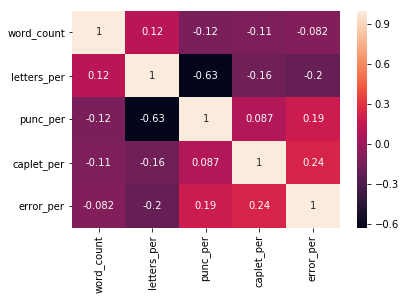

In [33]:
corr = blog[['word_count','letters_per','punc_per','caplet_per','error_per']].corr(); print(corr)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True)
plt.show()

__A. Scatterplot using univariate and bivariate methods__

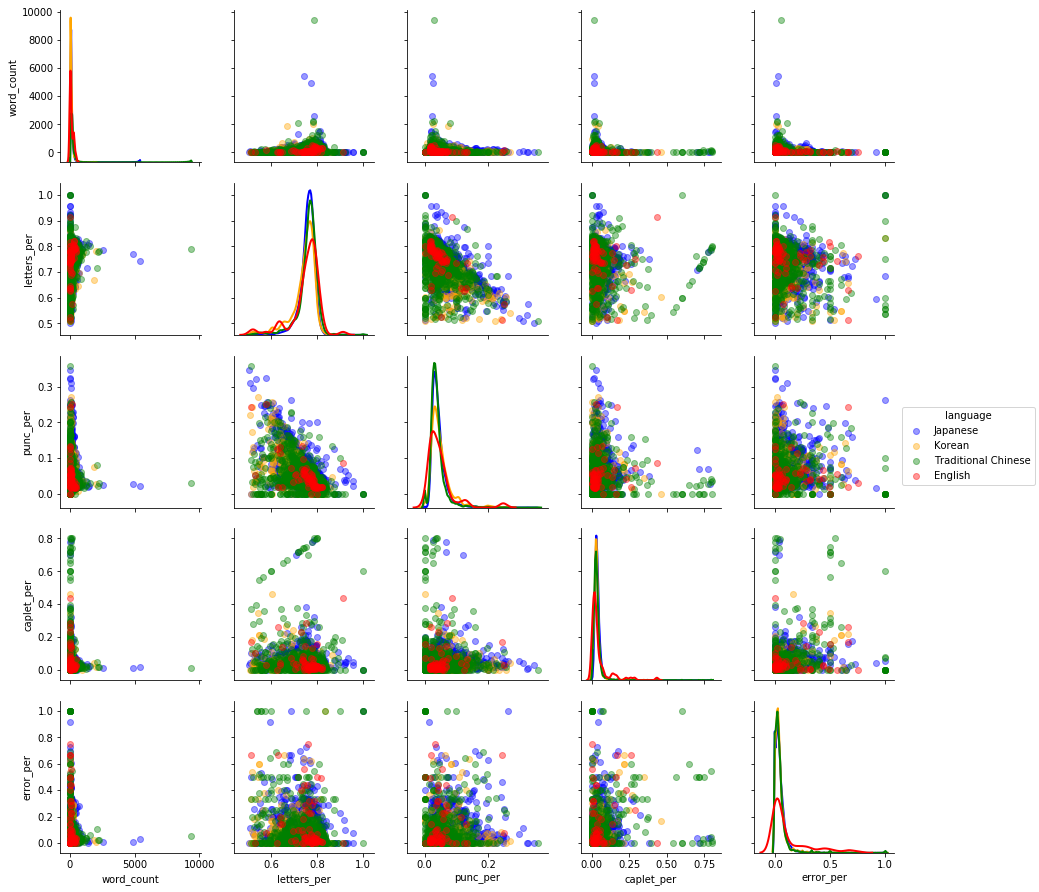

In [34]:
# Make the scatterplot matrix
featurelist = ['word_count','letters_per','punc_per','caplet_per','error_per']


g = sns.PairGrid(data=blog, diag_sharey=False, hue="language", vars=featurelist, palette=['blue','orange','green','red'])
g.map_offdiag(plt.scatter, alpha=.4)
g.map_diag(sns.kdeplot, lw=2)

g.add_legend()

plt.show()

<a id="sec3"></a>

###  <span style="color:darkblue">C. Statistical Significance <a href='#top'>(top)</a>

1. 'Multi class classification problem' 'Mutually exclusive classes'

2. Run Test on Japanese/English vs Chinese/English

__A. Mood’s Median test (2+ Non-Normally Distributed Independent Samples)__

__Null Hypothesis:__ Assumes samples are from same 1st language population.

In [35]:
stat, p, med, tbl = median_test(blog['error_per'].loc[blog['language'] == 'Japanese'],blog['error_per'].loc[blog['language'] == 'Korean'],blog['error_per'].loc[blog['language'] == 'Traditional Chinese'],blog['error_per'].loc[blog['language'] == 'English'])
print(stat,med)
print(p)

31.63745365440525 0.03225806451612903
6.239987282119213e-07


In [52]:
# print(len(*blog['language'].isin(lang)))

TypeError: len() takes exactly one argument (14055 given)

In [35]:
stat, p, med, tbl = median_test(*blog['language'].isin(lang))
print(stat,med)
print(p)

31.63745365440525 0.03225806451612903
6.239987282119213e-07


p-value is less than 5% and disproves the null hypothesis. With regards to error percentage, L1 language samples have different distributions.

__B. One-Way AnovaTest (2+ Normally Distributed Independent Samples)__

__Null Hypothesis:__ Assumes samples are from same 1st language population.

In [36]:
f, p = f_oneway(blog['error_per'].loc[blog['language'] == 'Japanese'],blog['error_per'].loc[blog['language'] == 'Korean'],blog['error_per'].loc[blog['language'] == 'Traditional Chinese'],blog['error_per'].loc[blog['language'] == 'English'])

print("F-Value: {}, p:{}".format(f,p))

F-Value: 32.88777483628028, p:3.566629650488519e-21


p-value is less than 5% and disproves the null hypothesis. L1 samples have different distributions.

<a id="output"></a>

# <span style="color:darkblue">Feature Processing for Models:</span>  <a href='#top'>(top)</a>

In [37]:
def create_dummy_count_df(df,col,keep=[]):
    colset = set(df[col].sum())
    if len(keep) > 0:
        colset = [k for k in keep if k in colset]
    newdf = pd.DataFrame()
    
    for c in colset:
        newdf[col+'_'+str(c)] = df[col].apply(lambda val: val.count(c) )
        
    print('Created dummy counter for {} features'.format(col))
        
    return newdf

In [38]:
keepletters = ['+e','+a','-t', '-n', '-i', '-a', '-e', '-s', '-o', '+l', '+s', '+t', '+o', '+r', '+h', '-l', '+i', 
               '-m', '-u', '+n', '-k', '-c', '-r', '-v', '+d', '-p', '-y', '-g', '+u', '-h', '-d', '+c', '+w', '+m', 
               '-b', '-0', '+p', '-j', '-w', '+y']

In [39]:
%%time
postags = create_dummy_count_df(blog,'pos')
posbigramtags = create_dummy_count_df(blog,'pos_bigram')
dettags = create_dummy_count_df(blog,'determiners')
checktags = create_dummy_count_df(blog,'checks')
preptags = create_dummy_count_df(blog,'prepositions')
comptags = create_dummy_count_df(blog,'complementizer')
lettertags = create_dummy_count_df(blog,'changes',keepletters)

Created dummy counter for pos features
Created dummy counter for pos_bigram features
Created dummy counter for determiners features
Created dummy counter for checks features
Created dummy counter for prepositions features
Created dummy counter for complementizer features
Created dummy counter for changes features
CPU times: user 3min 46s, sys: 1min 6s, total: 4min 52s
Wall time: 4min 55s


In [ ]:
# Inverse Frequency

In [58]:
features.head()

,pos_RB,pos_RBS,pos_RP,pos_VBZ,pos_JJS,pos_NNP,pos_PUNCT,pos_CD,pos_SYM,pos_CC,...,complementizer_nor,complementizer_and,complementizer_but,id,char_count,language,word_count,punc_per,caplet_per,error_per
0,5,0,0,2,0,0,8,0,0,5,...,0,4,0,1,313,Japanese,60,0.035144,0.044728,0.016667
1,0,0,0,1,0,0,4,0,0,0,...,0,0,0,1,168,Japanese,31,0.023810,0.029762,0.000000
2,3,0,1,7,0,0,21,1,0,3,...,0,2,1,1,690,Japanese,127,0.036232,0.031884,0.220472
3,1,0,0,2,0,0,6,0,0,2,...,0,1,1,2,325,Japanese,57,0.024615,0.055385,0.052632
4,5,0,1,2,0,0,8,0,0,2,...,0,1,0,2,340,Japanese,59,0.038235,0.023529,0.033898


In [53]:
features.head()

,pos_RB,pos_RBS,pos_RP,pos_VBZ,pos_JJS,pos_NNP,pos_PUNCT,pos_CD,pos_SYM,pos_CC,...,complementizer_nor,complementizer_and,complementizer_but,id,char_count,language,word_count,punc_per,caplet_per,error_per
0,5,0,0,2,0,0,8,0,0,5,...,0,4,0,1,313,Japanese,60,0.035144,0.044728,0.016667
1,0,0,0,1,0,0,4,0,0,0,...,0,0,0,1,168,Japanese,31,0.023810,0.029762,0.000000
2,3,0,1,7,0,0,21,1,0,3,...,0,2,1,1,690,Japanese,127,0.036232,0.031884,0.220472
3,1,0,0,2,0,0,6,0,0,2,...,0,1,1,2,325,Japanese,57,0.024615,0.055385,0.052632
4,5,0,1,2,0,0,8,0,0,2,...,0,1,0,2,340,Japanese,59,0.038235,0.023529,0.033898


In [40]:
blog_data = pd.DataFrame(blog[['id','char_count','language','word_count','punc_per','caplet_per','error_per']])
tags = [postags,posbigramtags,dettags,checktags,preptags,comptags,blog_data]
features = tags[0]
tags = tags[1:]
for i in range(len(tags)):
    features = features.merge(tags[i], how='outer', left_index=True, right_index=True)

__Group data by user averages:__

In [69]:
features.groupby('id').language.apply(lambda x: x == 'Japanese')

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
         ...  
15657     True
15658     True
15659     True
15660     True
15661     True
15662     True
15663     True
15664     True
15665     True
15666     True
15667     True
15668     True
15669     True
15670     True
15671     True
15672     True
15673     True
15674     True
15675    False
15676    False
15677    False
15681     True
15682     True
15683     True
15684     True
15685     True
15686     True
15687     True
15688     True
15689     True
Name: language, Length: 14055, dtype: bool

In [ ]:
features.

__Save Data:__

In [42]:
%%time
features.to_csv('blogfeatures.csv')
# features_user.to_csv('userblogfeatures.csv')

----